### Jose Luis Huillca Mango - Aprendizado de Maquina - UFF

# Find Phone Task

## Introduction

You’ve been tasked to implement a prototype of a visual object detection system for a customer. `The task is to find a location of a phone dropped on the floor` from a single RGB camera image. The customer has only one type of phone he is interested in detecting. Here is an example of a image with a phone on it:

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class='col-md-8' align='center'>
           <img src='images_jupyter/img_test.png' width="400"/>
      </div>
      <div class="col-md-2" align='center'></div>
  </div>
</div>

Consider a **normalized XY-coordinate** system for an image. Left-top corner of the image is defined as $(x, y) = (0, 0)$, left-bottom as $(x, y) = (0, 1)$, right-top as $(x, y) = (1, 0)$, and finally right-bottom corner as $(x, y) = (1, 1)$. Your “phone detector” has to find normalized coordinates of the center of the phone. In the example above, the coordinates of the phone are approximately $(x, y) = (0.26, 0.80)$. Every image contains a phone.

The customer has prepared a `small labeled dataset` for you. A dataset consists of approximately 100 jpeg images of the floor from the factory building with a phone on it. There is a file named **`labels.txt`** that contains normalized coordinates of a phone for each picture. Each line of the labels.txt is composed of **img_path, x, y** separated by spaces:

                        img_path, x (coordinate of the phone), y (coordinate of the phone)

We use one class where it is all our **help functions**, how *read_file, draw_point, euclidean*, ..., We use **`openCV functions`** too.

In [1]:
from DetectPhone.MyHelp import MyHelp

import sys
# We need to append the package of opencv
sys.path.append('/usr/local/lib/python3.6/site-packages')
import cv2

Here is an example of the first 3 lines from labels.txt:

In [2]:
img_path = "phone_data/find_phone_data/"
list_images = MyHelp.read_file(img_path + 'labels.txt')

for x in list_images[:3]:
    print(x)

['51.jpg', '0.2388', '0.6012']
['95.jpg', '0.2551', '0.3129']
['84.jpg', '0.7122', '0.7117']


The images and **labels.txt** are in the `phone_data/find_phone_data/` folder in the archive attached to this description.

In [3]:
# ploting support stuff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## USING OPENCV

## Train phone finder

The method used for the training was manual, we themed the coordinates where the image was, we cut the image with a **radius of 40** pixels around the coordinates and we only focused on that area to find the phone, changing the **`BGR range (Blue,Green,Red)`**, as shown in the image, that was done with most of the images, when the color range was decided, it was saved in a **`'rangeBGR.csv'`**, whose format was *(minimum color blue, green and red, maximum color blue, green and red)*, then make the sum of all of them and take an average for, that way we get the parameters `'BGR_low'` and `'BGR_high'`.

Everything necessary for that, is in the **`class DetectColor`**.

In [4]:
from DetectPhone.DetectColor import DetectColor

To find the phone in the given area, we convert the image into a color space **`'HSV'`**, so that its detection is easier, then applying a **BGR range filter**, calculated manually in the *`'OpenCV BGR Color Palette'`* window, I returned a black and white image, I used techniques to eliminate noise (**'erode'** and **'dilate'**). The main function is the following:

* `jhDetectColor = DetectColor(img_path, BGR_low, BGR_high)`
* `jhDetectColor.detect_color_and_palette_all(list_images)`

The **'OpenCV BGR Color Palette'** window had as a first parameter a **'switch'**, which when changed, changed the values of *'BGR_low'* and *'BGR_high'*, with '$0$' being **'BGR_low'** and '$1$' being **'BGR_high'**.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class='col-md-8' align='center'>
           <img src='images_jupyter/rangeBGR.png'/>
      </div>
      <div class="col-md-2" align='center'></div>
  </div>
</div>

The following code is to execute the manual training process, it is not executed in 'jupyter', since it is not possible to show opencv windows.

* `python train_phone_finder.py --path phone_data/find_phone`

We will show the first **six lines** of the file where the **BGR** ranges are, which will be added and the average will be obtained to form the **`'BGR_low'`** and **`'BGR_high'`**, which will be used to find the phone.

In [5]:
list_rangeBGR = MyHelp.read_file(img_path + 'rangeBGR.csv')
for x in list_rangeBGR[:6]:
    print(x)

['B_l,G_l,R_,B_h,G_h,R_h']
['37,7,0,222,163,132']
['44,9,0,222,255,154']
['44,9,0,222,255,154']
['44,9,0,222,255,154']
['44,9,0,222,255,154']


## Find phone

First, we get parameters of our `Train phone finder`, where **BGR_low** is the minimum **BGR**(*Blue Green Red*) and **BGR_high** is the maxmun that our image can take to recognize it.

In [6]:
BGR_low = [43, 6, 0]
BGR_high = [135, 248, 115]

All our functions are in **`class JoseHuillcaDetectPhone`**:

In [7]:
from DetectPhone.DetectPhone import JoseHuillcaDetectPhone

We create a variable of our class, where `img_path` is the path where our images. 

In [8]:
jhPhone = JoseHuillcaDetectPhone(img_path)

We show how we detect the phone, we choose one random number to test it.

In [9]:
from random import randint

In [10]:
random_img = randint(0, len(list_images) - 1)
img = cv2.imread(img_path + list_images[random_img][0])

**First**, we converte the original image to **`HSV`(Hue, Saturation, Value)** color space. After, we filter the image with a range color `cv2.inRange(hsv, BGR_low, BGR_high)`, where  **`BGR_low`** is the minimum color range and **`BGR_high`** is the maximum range color. we will obtain possible objects or colors that are between the given ranges, to eliminate noise we use **erode** and **dilate**, from the **`opencv`** library.

* **erode:** The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either $1$ or $0$) will be considered $1$ only if all the pixels under the kernel is $1$, otherwise it is eroded (made to zero).
* **dilate:** It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

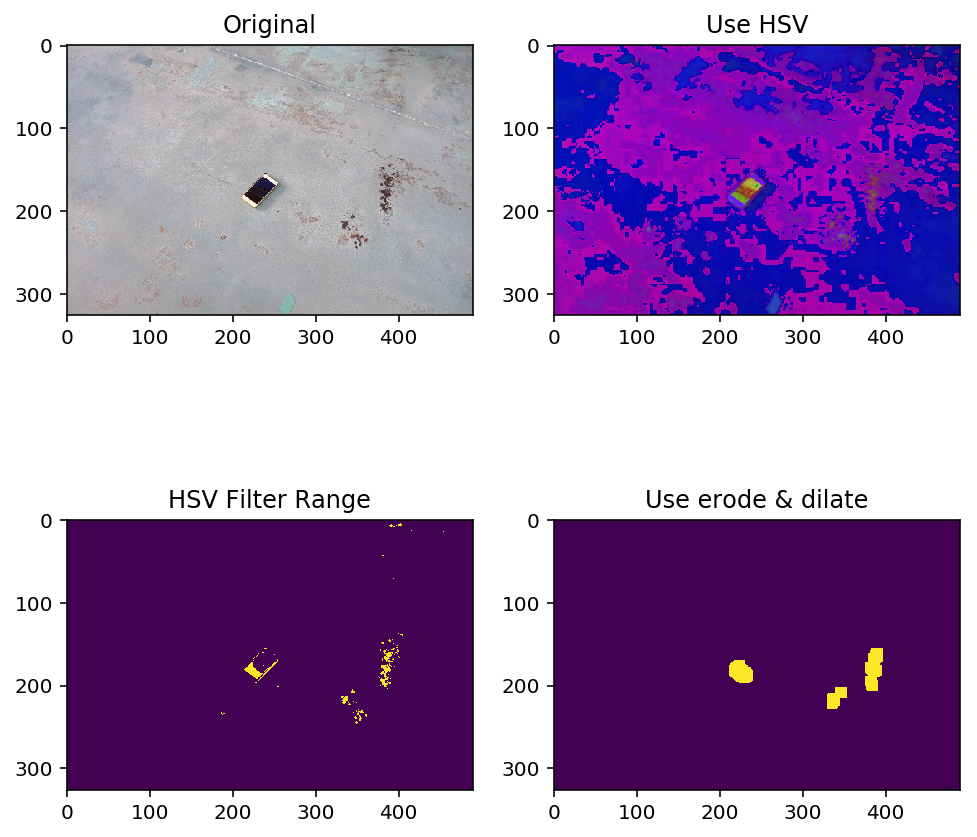

In [11]:
cnt = jhPhone.get_possible_contours(img, BGR_low, BGR_high, show_matploit=True)

In [12]:
def show_appropriates_contours(img, contours, centroids, radio):
    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
    for i in range(len(centroids)):
        cv2.circle(img, (centroids[i][0], centroids[i][1]), radio, (200, 5, 6), 2)
    MyHelp.display_multiple_images([img], ["Possible contour and phone area"], 1, 1)
    

Then, we obtain all the contours of the resulting image by applying the filter **'cv2.inRange'**, the ideal is just a contour, but it is possible that there is more than one, in some cases, we compute the area of each contour, if the area is between `min_area=250, max_area=2750`, we add to possible result.
* `cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)`: return all contours possibles

we will show the possible chosen contours (`green in the figure`) to make a new filter, but now only in a small **`RADIUS=40`** (`red in the figure`)

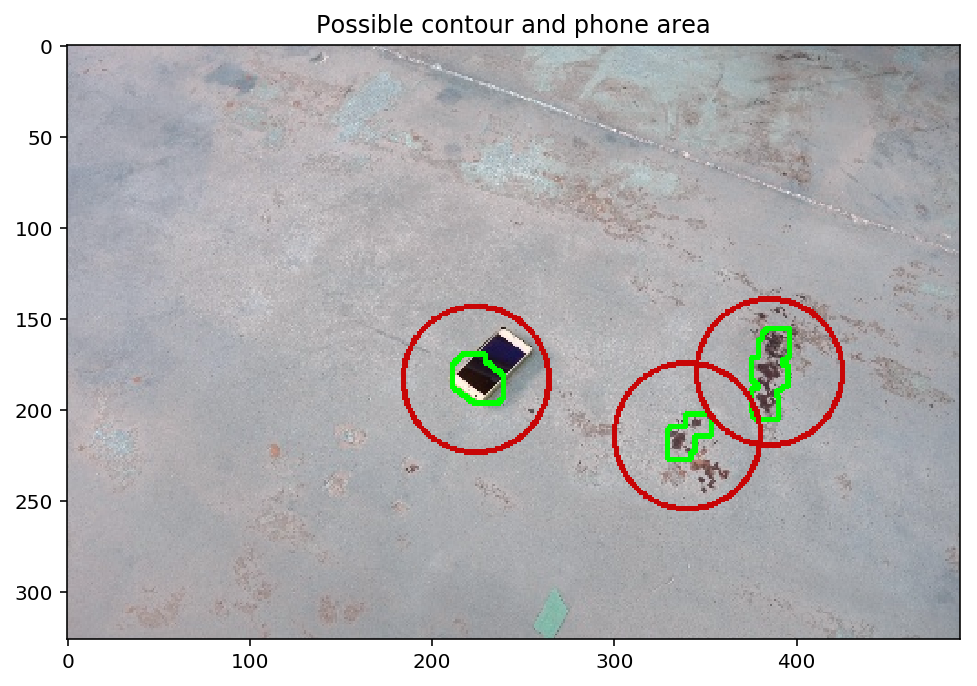

In [13]:
cnt_appropriates = jhPhone.choose_appropriate_contours(cnt)
centroids = jhPhone.get_centroids(cnt_appropriates)

show_appropriates_contours(img.copy(), cnt_appropriates, centroids, 40)

From all the possible contours, now with smaller areas, a new filter will be made in **gray scale**, we calculate the appropriate scale, starting with a minimum of `10` and with a maximum of `255`, the minimum is increasing until finding the **appropriate contour**, the contour will be adequate only if when finding the contour and applying an approximate contour method, an opencv function `cv2.approxPolyDP()`, used in **`MyHelp.contour_approx_to_poly()`** this function returns 4 points, those points are compared with ($x, y$) respectively, the distances were calculated manually, making tests with the train images:
* MIN_DISTANCE_PHONE = $(10, 20)$
* MAX_DISTANCE_PHONE = $(20, 50)$
* MAX_DISTANCE_PHONE_ADY = $(25, 70)$

To be able to use these distances we first calculate separate points, **(min_x, min_y)** the smaller one on the **'x'** axis and the smaller one on the **'y'** axis, then **(max_x, max_y)** the largest one on the **'x'** axis and the greater in the **'y'** axis, in this way we assure ourselves that they are separate points, and their **`Euclidean distance`** is adjacent. Each of these points is used to calculate the Euclidean distance with the remaining points (which are not those two). That way when ordering there will be two with greater distance and two with less distance, and a distance that is the adjacency, that distance will always be at the end of the ordered list. We use the parameters above to verify if they are within that range. (Parameters were found manually, several samples were taken and an average was drawn)

If no results were obtained, one of the contours previously calculated was selected and returned as a result.

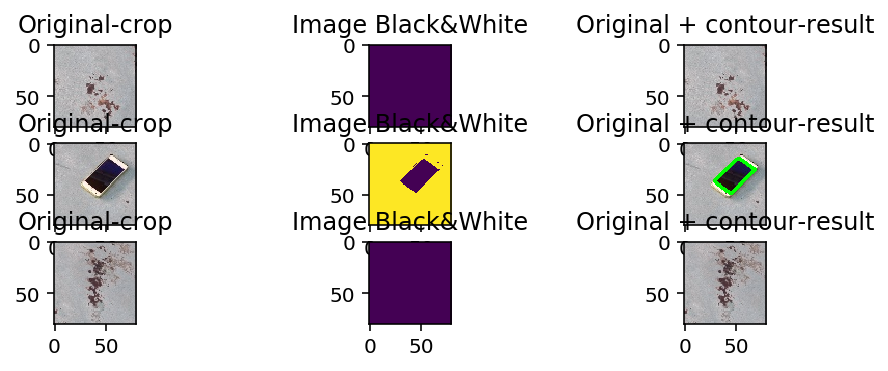

In [14]:
jhPhone.show_result_check_crop_image(img.copy(), centroids)

### Test with more images

We will try with random images, to corroborate our method.

In [15]:
import random

we will use only **8 images randomly** chosen for the test. Recall that **'list_images'** contains the name of the image and the coordinates of its location, ***'$(x, y)$'***.

The result that we will obtain will be the points ***'$(cx, cy)$'*** possible and the contours where the telephone is located. We will also compare the points ***$'(cx, cy)'$***, scaled, with ***$'(x, y)'$***, since the latter are on a scale of `'0-1'`. The function used to compare these points is the ***`Euclidean distance`***, with a tolerance of **`'0.05'`**.

In [16]:
num_test = 8
list_random = random.sample(range(0,len(list_images)-1), num_test)
list_test = [list_images[i] for i in list_random]

centroids, contours = jhPhone.detect_all_phones(list_test, BGR_low, BGR_high)

The next function is to show the resulting images, only the first four will be shown, so that it can be seen better.

In [17]:
def show_result_detect_all_phones(path, list_images, centroids, contours):
    list_imgs = []
    list_titles = []
    for i in range(len(list_images)):
        img = cv2.imread(path + list_images[i][0])
        MyHelp.draw_point(img, centroids[i][0], centroids[i][1], (255, 0,0))
        MyHelp.draw_box_min_area(img, contours[i], 2, (0, 255, 0))
        list_imgs.append(img)
        list_titles.append(list_images[i][0])
    # We only show the 4 first
    MyHelp.display_multiple_images(list_imgs, list_titles, 2, 2)

We show the results, with **`green color`** the **resulting contour** and with **`red color`** the **center**.

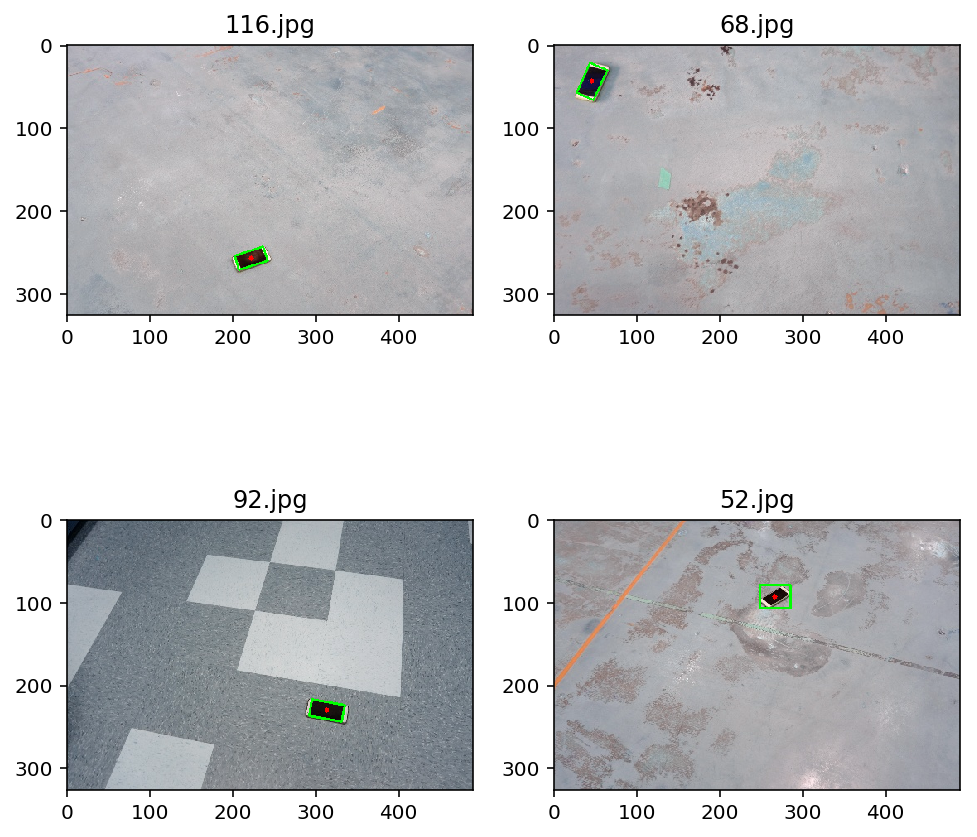

In [18]:
show_result_detect_all_phones(img_path, list_test, centroids, contours)

`Accuracy` obtained from the $8$ **images** chosen **randomly**.

In [19]:
jhPhone.get_accuracy(list_test, centroids, tolerance=0.05)

Accuracy = 100.0%


## Test all images

Now we will test with all the images and show the **precicion of our method**.

In [20]:
centroids_all,_ = jhPhone.detect_all_phones(list_images, BGR_low, BGR_high)

Accuracy obtained from all the images, whose composition of their desired centers **'x'**, **'y'** and their **'cx'**, **'c'** and obtained have an error tolerance of **`0.05`**.

In [21]:
jhPhone.get_accuracy(list_images, centroids_all, tolerance=0.05)

Accuracy = 96.12403100775194%


## Conclusions

The training process was done manually, since you had to obtain a range of colors to be used in the **'HSV'** image, the training was done with a large part of the images, and for all the images was obtained its minimum *BGR(Blue,Green,Red)* and its maximum BGR, the sum of everything was done and an average was made to be the **`"BGR_low"`** and **`"BGR_high"`** required, in the same way the minimum and maximum ranges of the distances of the telephones and your areas. To eliminate the noise **'erode'** and **'dilate'** were used, but even so there could be false positives, to eliminate that, the possible results were taken and another filter was passed, in this way the presicion of the center of the telephone was improved . A *grayscale threshold* was used only in a radius of the possible results, for example if there were three possible results, only one would be chosen. To select the right one, we took the range of the measurements of the telephone, if it was inside them, it was the indicated one.

The part of the training, calculating the minimum and maximum range of the BGR can be automated in some way, since it was a bit difficult to calculate the possibly correct range to be used.
For now the cell phone detection works in images similar to those that were tested.

Results greater than $90\%$ were obtained.

To run it from console:
* python find_phone.py --image 'path/image.jpg'

As a result are the positions where the phone is located **`(x, y)`** respectively.

In [22]:
!python3 find_phone.py --image phone_data/find_phone_data/0.jpg

0.8326530612244898 0.12883435582822086


### System information

In [23]:
%load_ext version_information
%version_information numpy, matplotlib, sklearn, cv2

Software versions
Python 3.6.4 64bit [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
IPython 6.3.1
OS Darwin 17.3.0 x86_64 i386 64bit
numpy 1.14.2
matplotlib 2.2.2
sklearn 0.19.1
cv2 4.0.0-pre
Tue May 29 21:29:53 2018 -03